<a href="https://colab.research.google.com/github/palash04/Artificial-Intelligence/blob/master/Neural_Networks/Intro_to_Pytorch/_01_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Screenshot 2020-06-29 at 17 15 11](https://user-images.githubusercontent.com/26361028/86001132-1876fd00-ba2c-11ea-9cf6-d069b0eeb914.png)
![Screenshot 2020-06-29 at 17 15 39](https://user-images.githubusercontent.com/26361028/86001182-29277300-ba2c-11ea-9516-4401fb360888.png)


In [4]:
# Importing pytorch
import torch

In [5]:
# Activation (sigmoid) function
def activation(x):
  """ Sigmoid Activaion Function
      Arguments
      ---------
      x : torch.Tensor
  """
  return 1 / (1 + torch.exp(-x))

In [6]:
# Example

x = torch.Tensor([1,2,3,4])
print (activation(x))

tensor([0.7311, 0.8808, 0.9526, 0.9820])


In [7]:
### Generate some data
torch.manual_seed(7) # set the random seed so that things are predictable

# Features are 5 random normal variables
features = torch.randn((1,5)) # 2 dimensional tensor 1 row and 5 columns, contains values randomly distributed according to the normal distribution with mean of zero and standard deviation of one

# Weights for our data, random weights again
weights = torch.randn_like(features) # same shape as features, again containing values from normal distribution

# and a bias term
bias = torch.randn((1,1)) # 1 row, and 1 column, i.e just one value


In [8]:
features.shape

torch.Size([1, 5])

In [9]:
weights.shape

torch.Size([1, 5])

In [10]:
x = torch.sum(features*weights) + bias
y = activation(x)
print (y)

# another way
y = activation((features*weights).sum() + bias)
print (y)

tensor([[0.1595]])
tensor([[0.1595]])


You can do the multiplication and sum in the same operation using a matrix multiplication. In general, you'll want to use matrix multiplications since they are more efficient and accelerated using modern libraries and high-performance computing on GPUs.

Here, we want to do a matrix multiplication of the features and the weights. For this we can use torch.mm() or torch.matmul() which is somewhat more complicated and supports broadcasting. If we try to do it with features and weights as they are, we'll get an error

In [11]:
torch.mm(features,weights)

RuntimeError: ignored

 - weights.reshape(a, b) will return a new tensor with the same data as weights with size (a, b) sometimes, and sometimes a clone, as in it copies the data to another part of memory.
 - weights.resize_(a, b) returns the same tensor with a different shape. However, if the new shape results in fewer elements than the original tensor, some elements will be removed from the tensor (but not from memory). If the new shape results in more elements than the original tensor, new elements will be uninitialized in memory. Here I should note that the underscore at the end of the method denotes that this method is performed in-place. Here is a great forum thread to read more about in-place operations in PyTorch.
 - weights.view(a, b) will return a new tensor with the same data as weights with size (a, b).

In [12]:
# So, now we can reshape weights to have five rows and 1 column like
weights = weights.view(5,1)
weights.shape

torch.Size([5, 1])

In [13]:
y = activation(torch.mm(features,weights) + bias)
print (y)

tensor([[0.1595]])


![Screenshot 2020-06-29 at 19 34 20](https://user-images.githubusercontent.com/26361028/86015711-8a0c7680-ba3f-11ea-80b0-fb91758c46d7.png)
![Screenshot 2020-06-29 at 19 34 44](https://user-images.githubusercontent.com/26361028/86015758-97c1fc00-ba3f-11ea-935c-3dc45eb7ca14.png)


In [14]:
# Implementing above neural network, for some random data

### Generate some data
torch.manual_seed(7) # set the random seed so that things are predictable

# Features are 3 random normal variables
features = torch.randn((1,3))

# Define the size of each layer in our network
n_input = features.shape[1]
n_hidden = 2    # Number of hidden units
n_output = 1    # Number of output units

# Weights for inputs to hidden layer
W1 = torch.randn((n_input,n_hidden))

# Weights for hidden layer to output layer
W2 = torch.randn((n_hidden,n_output))

# Bias terms for hidden and output layer
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1,n_output))

In [15]:
# Calculating the output for multi-layer network using weights W1 and W2, and the biases B1 and B2

h = activation(torch.mm(features,W1) + B1)
y = activation(torch.mm(h,W2) + B2)
print (y)

tensor([[0.3171]])


Numpy to torch and back

In [16]:
import numpy as np

In [17]:
a = np.random.rand(4,3)
a

array([[0.4949733 , 0.2898629 , 0.55330195],
       [0.76009278, 0.0901079 , 0.91771219],
       [0.95775943, 0.01649582, 0.02168991],
       [0.80281124, 0.83804703, 0.1478994 ]])

In [18]:
b = torch.from_numpy(a)
b

tensor([[0.4950, 0.2899, 0.5533],
        [0.7601, 0.0901, 0.9177],
        [0.9578, 0.0165, 0.0217],
        [0.8028, 0.8380, 0.1479]], dtype=torch.float64)

In [19]:
b.numpy()

array([[0.4949733 , 0.2898629 , 0.55330195],
       [0.76009278, 0.0901079 , 0.91771219],
       [0.95775943, 0.01649582, 0.02168991],
       [0.80281124, 0.83804703, 0.1478994 ]])

In [20]:
# The memory is shared between the Numpy array and Torch tensor, so if we change the values in-place of one object, the other will change as well.
b.mul_(2)

tensor([[0.9899, 0.5797, 1.1066],
        [1.5202, 0.1802, 1.8354],
        [1.9155, 0.0330, 0.0434],
        [1.6056, 1.6761, 0.2958]], dtype=torch.float64)

In [21]:
a

array([[0.9899466 , 0.57972581, 1.1066039 ],
       [1.52018556, 0.18021579, 1.83542438],
       [1.91551885, 0.03299164, 0.04337982],
       [1.60562248, 1.67609406, 0.29579879]])

Deep learning networks tend to be massive with dozens or hundreds of layers, that's where the term "deep" comes from. You can build one of these deep networks using only weight matrices as we did in the previous notebook, but in general it's very cumbersome and difficult to implement. PyTorch has a nice module **nn** that provides a nice way to efficiently build large neural networks.

## Coding our first pytorch neural network

In [22]:
# importing necessary pacakages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper
import matplotlib.pyplot as plt


Probelm : Identifying text in an image. </br>
Dataset used : MNIST dataset, which consists of greyscale handwritten digits. </br>
Each image is 28x28 pixels. 

![Screenshot 2020-06-30 at 07 36 24](https://user-images.githubusercontent.com/26361028/86074907-69c2d300-baa4-11ea-9bdf-6f72fb28e789.png)

Goal is to build a neural network that can take one of these images and predict the digit in the image.


In [23]:
# Downloading the dataset.
# This is provided by torchvision package

from torchvision import datasets, transforms

# Define a transform to normalize the data
# transforms.ToTensor() converts inupt image to Python Tensor
# transforms.Normalize scales input data 
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
                                ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data',download=True,train=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


So, below we have tensor with size (64,1,28,28) i.e 64 images per batch, 1 color channel, and 28x28 images

In [24]:
dataiter = iter(trainloader)
images,labels = dataiter.next()
print (type(images))
print (images.shape)
print (labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


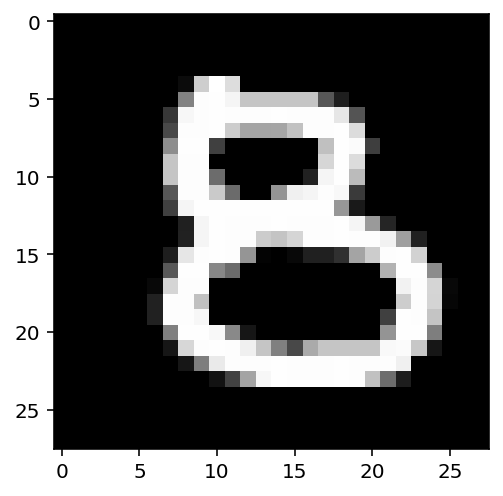

In [25]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

In [26]:
images[0].shape

torch.Size([1, 28, 28])

In [27]:
images.shape[0]

64

# TODO:
Flatten the batch of images. Then build a multi-layer network with 784 input units, 256 hidden units, and 10 output units using random tensors for the weights and biases. For now, use a sigmoid activation for the hidden layer. Leave the output layer without an activation,

In [28]:
# Solution:

def activation(x):
  return 1 / (1 + torch.exp(-x))

# Flatten the input images
inputs = images.view(images.shape[0],-1)      # (64,784)

# Create parameters
n_input = inputs.shape[1]     # Number of input features
n_hidden = 256                # Number of hidden units
n_output = 10                 # Number of output units (0 - 9)

w1 = torch.randn((n_input,n_hidden))
b1 = torch.randn(n_hidden)

w2 = torch.randn((n_hidden,n_output))
b2 = torch.randn(n_output)

h = activation(torch.mm(inputs,w1) + b1)        # [inputs]_mat_of_size(64x784) x [w1]_mat_of_size(784x256) => [h]_mat_of_size(64x256)
output = torch.mm(h,w2) + b2                    # [h]_mat_of_size(64x256) x [w2]_mat_of_size(256,10) = [output]_mat_of_size(64x10)

print (output)



tensor([[ 4.1850e+00,  1.7385e+01, -2.0025e+01, -3.1723e+00, -3.5890e+00,
         -5.5427e-01,  6.3814e+00,  1.2403e+01,  4.3539e-01,  5.4370e+00],
        [-4.7575e+00,  1.5829e+01, -2.2019e+01,  5.1966e+00, -5.0433e-01,
          8.2517e+00,  1.0362e+01,  4.4520e+00,  1.6230e+01,  6.6735e+00],
        [-5.8159e+00,  2.0752e+01, -1.4510e+01, -4.0851e+00,  1.2044e+01,
         -5.2770e+00,  1.5019e+01,  6.0332e+00,  2.6487e+00,  4.7284e+00],
        [-6.5566e-02,  9.0499e+00, -6.1621e+00, -8.0228e+00,  8.4912e-01,
         -1.2533e+01,  5.8463e+00,  1.1087e+01,  8.1131e+00, -1.1102e+00],
        [-1.0341e+01,  7.8912e+00, -1.3880e+01,  3.2861e+00,  5.5803e+00,
          5.1073e+00,  1.1375e+01,  7.1374e+00,  1.2983e+01, -4.1446e+00],
        [-8.7998e+00,  1.2696e+01, -9.1019e+00, -3.2297e+00,  1.3302e+01,
         -5.5572e+00,  1.9638e+01,  1.2058e+01,  2.7587e+00, -9.6813e-01],
        [-4.3998e+00,  9.7839e+00, -9.3046e+00, -5.2474e-01,  1.3046e+01,
          9.3212e+00,  1.4141e+0

In [29]:
output.shape

torch.Size([64, 10])

Now we have 10 outputs for our network. We want to pass in an image to our network and get out a probability distribution over the classes that tells us the likely class(es) the image belongs to.

![Screenshot 2020-06-30 at 09 43 52](https://user-images.githubusercontent.com/26361028/86082769-36893f80-bab6-11ea-8ca5-503d0a473a4d.png)

Here we see that the probability for each class is roughly the same. This is representing an untrained network, it hasn't seen any data yet so it just returns a uniform distribution with equal probabilities for each class.

To calculate this probability distribution, we often use the softmax function. Mathematically this looks like - 

![Screenshot 2020-06-30 at 09 44 42](https://user-images.githubusercontent.com/26361028/86082826-54ef3b00-bab6-11ea-8e47-8e5b70b9c09f.png)

What this does is squish each input $x_i$ between 0 and 1 and normalizes the values to give you a proper probability distribution where the probabilites sum up to one.


In [30]:
# In out example, output matrix size = (64,10)
# So, for one example in each row, we want to sum all 10 columns
def softmax(x):
  return torch.exp(x) / torch.sum(torch.exp(x),dim=1).view(-1,1)      # we want the sum across the columns, so dim = 1

In [31]:
probabilities = softmax(output)
print (probabilities.shape) # should be 64x10
print (probabilities.sum(dim=1))      # sum should be 1


torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


# Building networks with Pytorch

###### Building the same above network with Pytorch's nn 


In [32]:
from torch import nn

In [33]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()

    # Inputs to hidden layer linear transformation
    self.hidden = nn.Linear(784, 256)   # since we know input features will 784 long and 256 hidden units

    # Output layer - 10 units - one for each digit
    self.output = nn.Linear(256,10) 

    # Define sigmoid activation and softmax output
    self.sigmoid = nn.Sigmoid()
    self.softmax = nn.Softmax(dim=1)

  def forward(self,x):
    x = self.hidden(x)
    x = self.sigmoid(x)
    x = self.output(x)
    x = self.softmax(x)

    return x

![Screenshot 2020-06-30 at 11 43 38](https://user-images.githubusercontent.com/26361028/86090018-f2eb0180-bac6-11ea-8b8c-f536bef243d4.png)


In [34]:
# Create the newtwork
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [35]:
# We can also define the above network more concisely and clearly using torch.nn.functional module
# We normally import this as F

import torch.nn.functional as F

class Network(nn.Module):
  def __init__(self):
    super().__init__()

    self.hidden = nn.Linear(784,256)
    self.output = nn.Linear(256,10)
  
  def forward(self,x):
    x = F.sigmoid(self.hidden(x))
    x = F.softmax(self.output(x))

    return x

In [36]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

![Screenshot 2020-06-30 at 11 58 00](https://user-images.githubusercontent.com/26361028/86091116-f41d2e00-bac8-11ea-9afc-dcc9d45fe9a1.png)


Objective : Build a multi-layer neural network that utilizes the ReLU activation function in it's hidden layers.

Build this - </br>
![Screenshot 2020-06-30 at 12 00 21](https://user-images.githubusercontent.com/26361028/86091300-48281280-bac9-11ea-8c74-67cfb45fda7a.png)




In [37]:
import torch
import torch.nn.functional as F

class Network(nn.Module):
  def __init__(self):
    super().__init__()

    self.hidden1 = nn.Linear(784,128)
    self.hidden2 = nn.Linear(128,64)
    self.output = nn.Linear(64,10)
  
  def forward(self,x):
    x = F.relu(self.hidden1(x))
    x = F.relu(self.hidden2(x))
    x = F.softmax(self.output(x),dim=1)

    return x


In [38]:
model = Network()
model

Network(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

### Initializing the weights and biases

In [39]:
# Acessing the weights and bias attached to the layer
print (model.hidden1.weight)
print (model.hidden1.bias)


Parameter containing:
tensor([[-0.0027, -0.0015,  0.0289,  ...,  0.0127,  0.0287,  0.0160],
        [ 0.0148, -0.0356,  0.0197,  ...,  0.0144, -0.0031,  0.0178],
        [-0.0047, -0.0077, -0.0325,  ...,  0.0319,  0.0353,  0.0111],
        ...,
        [ 0.0268, -0.0230,  0.0033,  ...,  0.0229,  0.0125,  0.0056],
        [ 0.0048, -0.0178, -0.0268,  ...,  0.0226, -0.0118, -0.0277],
        [-0.0298,  0.0009,  0.0248,  ..., -0.0197, -0.0324, -0.0007]],
       requires_grad=True)
Parameter containing:
tensor([-0.0055, -0.0025, -0.0040,  0.0211, -0.0023,  0.0197, -0.0098,  0.0086,
         0.0153,  0.0127, -0.0080, -0.0018,  0.0310,  0.0209, -0.0279,  0.0038,
         0.0211, -0.0280, -0.0354, -0.0346,  0.0077,  0.0270,  0.0150, -0.0330,
         0.0125,  0.0229, -0.0355, -0.0016,  0.0294,  0.0053,  0.0350,  0.0210,
         0.0011,  0.0176,  0.0002, -0.0127, -0.0130, -0.0164, -0.0134, -0.0212,
        -0.0277,  0.0214,  0.0184,  0.0059, -0.0313, -0.0188,  0.0225,  0.0299,
         0.0299

In [40]:
# Set biases to all zeros
model.hidden1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [41]:
# sample from random normal with standard dev = 0.01
model.hidden1.bias.data.normal_(std=0.01)

tensor([-0.0042, -0.0140,  0.0065,  0.0104, -0.0085, -0.0073, -0.0076, -0.0065,
        -0.0010,  0.0184, -0.0009,  0.0052,  0.0038,  0.0072,  0.0213,  0.0241,
        -0.0132, -0.0061,  0.0091,  0.0063,  0.0019,  0.0087,  0.0155,  0.0103,
        -0.0086,  0.0164, -0.0085,  0.0208, -0.0049,  0.0193,  0.0099,  0.0143,
         0.0030,  0.0088, -0.0026, -0.0032,  0.0004,  0.0140,  0.0151,  0.0068,
        -0.0021, -0.0022, -0.0064, -0.0006,  0.0143,  0.0072,  0.0057,  0.0126,
        -0.0076,  0.0173, -0.0010, -0.0039,  0.0031,  0.0062, -0.0063,  0.0105,
         0.0099, -0.0075, -0.0015, -0.0107, -0.0046, -0.0040, -0.0128, -0.0072,
         0.0112,  0.0089,  0.0072,  0.0093, -0.0086, -0.0056, -0.0054,  0.0022,
         0.0096, -0.0114,  0.0018,  0.0086,  0.0034,  0.0062,  0.0070,  0.0053,
        -0.0048,  0.0169, -0.0053, -0.0076, -0.0061, -0.0030,  0.0220, -0.0085,
        -0.0063,  0.0058, -0.0118, -0.0162, -0.0028,  0.0042, -0.0152,  0.0125,
        -0.0025, -0.0037, -0.0067, -0.00

## Using nn.Sequential

PyTorch provides a convenient way to build networks like this where a tensor is passed sequentially through operations, nn.Sequential. Using this to build the equivalent network:

In [51]:
# Hyperparameters for our network

input_size = 784
hidden_sizes = [128,64]
output_size = 10

# Build a feed-forward neural network
model = nn.Sequential(nn.Linear(input_size,hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0],hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1],output_size),
                      nn.Softmax(dim=1))

print (model)

# Forward pass through the network and display the output
images,labels = next(iter(trainloader))
images = images.view(images.shape[0],1,784)
ps = model.forward(images[0,:])

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


In [53]:
images.shape

torch.Size([64, 1, 784])

In [56]:
print (model[0])
print (model[0].weight)

Linear(in_features=784, out_features=128, bias=True)
Parameter containing:
tensor([[-0.0274, -0.0194, -0.0051,  ...,  0.0215,  0.0178,  0.0150],
        [ 0.0351, -0.0314, -0.0009,  ..., -0.0196,  0.0122, -0.0218],
        [-0.0119, -0.0339,  0.0007,  ..., -0.0318,  0.0254, -0.0203],
        ...,
        [ 0.0225,  0.0047, -0.0256,  ..., -0.0111,  0.0008, -0.0111],
        [ 0.0237,  0.0289, -0.0045,  ..., -0.0280, -0.0062, -0.0156],
        [-0.0232,  0.0349, -0.0028,  ..., -0.0111,  0.0023,  0.0116]],
       requires_grad=True)


![Screenshot 2020-06-30 at 12 35 09](https://user-images.githubusercontent.com/26361028/86094433-24b39680-bace-11ea-8b62-9e1f7bcd0697.png)

## Backpropagation

![Screenshot 2020-06-30 at 18 19 51](https://user-images.githubusercontent.com/26361028/86127929-4b89c100-bafe-11ea-94ee-0de42544d604.png)

![Screenshot 2020-06-30 at 18 22 02](https://user-images.githubusercontent.com/26361028/86128134-9a375b00-bafe-11ea-9eb6-1f2fda7736f9.png)


![Screenshot 2020-06-30 at 18 25 04](https://user-images.githubusercontent.com/26361028/86128475-07e38700-baff-11ea-93a0-9f7a1e994efc.png)




### Losses in Pytorch
Let's start by seeing how we calculate the loss with PyTorch. Through the nn module, PyTorch provides losses such as the cross-entropy loss (nn.CrossEntropyLoss). You'll usually see the loss assigned to criterion. As noted in the last part, with a classification problem such as MNIST, we're using the softmax function to predict class probabilities. With a softmax output, you want to use cross-entropy as the loss. To actually calculate the loss, you first define the criterion then pass in the output of your network and the correct labels.

- This criterion combines nn.LogSoftmax() and nn.NLLLoss() in one single class.
- The input is expected to contain scores for each class.

This means we need to pass in the raw output of our network into the loss, not the output of the softmax function. This raw output is usually called the logits or scores. We use the logits because softmax gives you probabilities which will often be very close to zero or one but floating-point numbers can't accurately represent values near zero or one.
It's usually best to avoid doing calculations with probabilities, typically we use log-probabilities.


In [21]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets,transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
                                ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/',download=True,train=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size = 64, shuffle = True)

In [62]:
# Build a feedforward neural network
model = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10))

# Define the Loss
criterion = nn.CrossEntropyLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0],-1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with logits and labels
loss = criterion(logits,labels)

print (loss)

tensor(2.2718, grad_fn=<NllLossBackward>)


In [65]:
# Building a feed-forwaard neural network
# with log-softmax output and using negative log likelihood loss

model = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1))

# Define the Loss
criterion = nn.NLLLoss()

# Get our data
images,labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0],-1)

# Forward pass, get our logits
logps = model(images)
# Calculate the loss with logits and labels
loss = criterion(logps,labels)

print (loss)

tensor(2.3010, grad_fn=<NllLossBackward>)


![Screenshot 2020-06-30 at 22 11 11](https://user-images.githubusercontent.com/26361028/86152990-9d424380-bb1e-11ea-8771-b729260ab017.png)


In [67]:
x = torch.randn(2,2,requires_grad = True)
print (x)

tensor([[0.4253, 0.5767],
        [0.0469, 1.3786]], requires_grad=True)


In [68]:
y = x**2
print (y)

tensor([[0.1809, 0.3326],
        [0.0022, 1.9007]], grad_fn=<PowBackward0>)


In [69]:
# grad_fn shows the function that generated this variable
print (y.grad_fn)

In [70]:
# The autograd module keeps track of these operations and knows how to calculate the gradient for each one.
# In this way, it's able to calculate gradient for chain of operations, with respect to any one tensor.

# Let's reduce the tensor y to scalar value, the mean
z = y.mean()
print (z)

tensor(0.6041, grad_fn=<MeanBackward0>)


In [71]:
# Checking the gradients of x and y, they should be empty curently as we didn't backpropagate
print (x.grad)

None


![Screenshot 2020-06-30 at 22 18 59](https://user-images.githubusercontent.com/26361028/86153718-b39ccf00-bb1f-11ea-99fa-fea80e123836.png)


In [72]:
z.backward()
print (x.grad)
print (x/2)

tensor([[0.2127, 0.2883],
        [0.0234, 0.6893]])
tensor([[0.2127, 0.2883],
        [0.0234, 0.6893]], grad_fn=<DivBackward0>)


In [45]:
# Build a feed-forward neural network
model = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images,labels = next(iter(trainloader))
images = images.view(images.shape[0],-1)

logps = model(images)
loss = criterion(logps,labels)
loss

tensor(2.2803, grad_fn=<NllLossBackward>)

In [35]:
images.shape

torch.Size([64, 784])

In [36]:
print ('Before Backpropagation: \n', model[0].weight.grad)    #  model[0].weight is the weights between input and hiddenlayer 1

loss.backward()

print ('After Backpropagation: \n', model[0].weight.grad)


Before Backpropagation: 
 None
After Backpropagation: 
 tensor([[ 3.3637e-03,  3.3637e-03,  3.3637e-03,  ...,  3.3637e-03,
          3.3637e-03,  3.3637e-03],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 3.3560e-03,  3.3560e-03,  3.3560e-03,  ...,  3.3560e-03,
          3.3560e-03,  3.3560e-03],
        ...,
        [-6.9562e-05, -6.9562e-05, -6.9562e-05,  ..., -6.9562e-05,
         -6.9562e-05, -6.9562e-05],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-4.3422e-03, -4.3422e-03, -4.3422e-03,  ..., -4.3422e-03,
         -4.3422e-03, -4.3422e-03]])


Now, we use an optimizer to update the weights with the gradients. 
We get these from pytorch's optim package. 
- Ex. We can use stochastic gradient descent with optim.SGD

In [23]:
from torch import optim

# Optimizers requires parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr = 0.01)

Now we know how to use all the individual parts so it's time to see how they work together. Let's consider just one learning step before looping through all the data. The general process with PyTorch:

- Make a forward pass through the network
- Use the network output to calculate the loss
- Perform a backward pass through the network with loss.backward() to calculate the gradients
- Take a step with the optimizer to update the weights

In [37]:
print ('Initial Weights - ', model[0].weight)

images,labels = next(iter(trainloader))
images.resize_(64,784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, the  backward pass, then update weights
output = model.forward(images)
loss = criterion(output, labels)
loss.backward()
print ('Gradient - ', model[0].weight.grad)


Initial Weights -  Parameter containing:
tensor([[-0.0018, -0.0072,  0.0231,  ..., -0.0330,  0.0143, -0.0090],
        [ 0.0212, -0.0127, -0.0028,  ...,  0.0223,  0.0219, -0.0242],
        [-0.0042, -0.0115,  0.0200,  ..., -0.0210, -0.0013, -0.0299],
        ...,
        [-0.0330,  0.0226,  0.0220,  ...,  0.0052,  0.0209,  0.0094],
        [ 0.0081,  0.0042, -0.0178,  ...,  0.0226, -0.0042, -0.0199],
        [ 0.0075, -0.0058,  0.0035,  ...,  0.0200, -0.0264,  0.0267]],
       requires_grad=True)
Gradient -  tensor([[ 0.0042,  0.0042,  0.0042,  ...,  0.0042,  0.0042,  0.0042],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0038,  0.0038,  0.0038,  ...,  0.0038,  0.0038,  0.0038],
        ...,
        [-0.0009, -0.0009, -0.0009,  ..., -0.0009, -0.0009, -0.0009],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0107, -0.0107, -0.0107,  ..., -0.0107, -0.0107, -0.0107]])


In [27]:
# Take an update step and fill the new weights
optimizer.step()
print ('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-0.0029, -0.0348,  0.0005,  ..., -0.0319,  0.0222,  0.0323],
        [ 0.0127,  0.0054,  0.0023,  ..., -0.0218, -0.0183,  0.0238],
        [-0.0083,  0.0124, -0.0054,  ..., -0.0308, -0.0213, -0.0283],
        ...,
        [-0.0261, -0.0233,  0.0121,  ...,  0.0126,  0.0233, -0.0254],
        [-0.0048,  0.0352,  0.0160,  ..., -0.0302, -0.0243,  0.0272],
        [ 0.0110,  0.0336,  0.0236,  ..., -0.0027,  0.0353,  0.0321]],
       requires_grad=True)


#### Training for real

In [43]:
import torch
import torch.nn.functional as F
from torch import optim
from torchvision import datasets,transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
                                ])

# Download and load the training data
trset = datasets.MNIST('~/.pytorch/MNIST_data/',download=True,train=True,transform=transform)
trloader = torch.utils.data.DataLoader(trainset,batch_size = 64, shuffle = True)

In [52]:
model = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 5
for e in range(epochs):
  running_loss = 0
  for images,labels in trloader:
    # Flatten MNIST images into 784 long vector
    images = images.view(images.shape[0],-1)

    # Training pass
    optimizer.zero_grad()

    output = model(images)
    loss = criterion(output,labels)
    loss.backward()
    optimizer.step()    # to update the weights
    running_loss += loss.item()
  
  print(f"Training loss: {running_loss/len(trloader)}") 



Training loss: 1.051402537998106
Training loss: 0.38951910079033897
Training loss: 0.32854559195480115
Training loss: 0.29369335960763604
Training loss: 0.2681131253221523
